<a href="https://colab.research.google.com/github/ClausGB/Calculo_Aplicado/blob/main/Sumas_de_Riemann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Integracion Numerica - Sumas de Riemann**

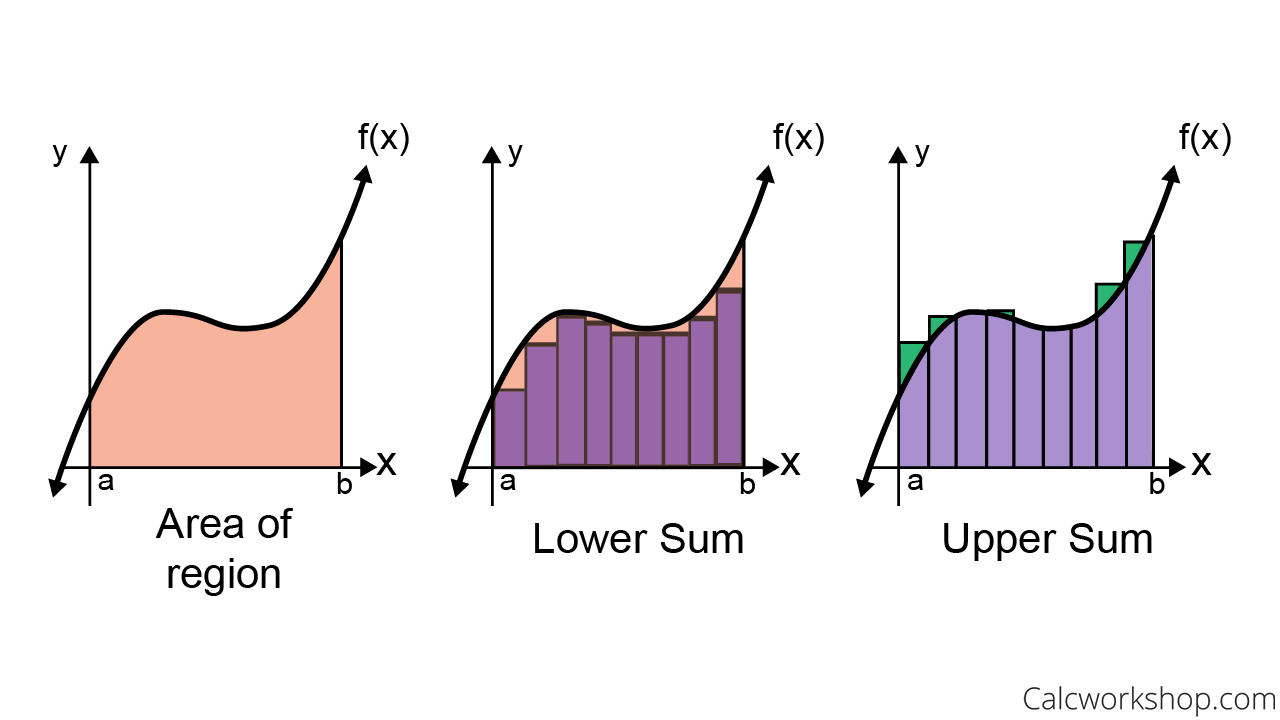

Se llama Suma de Riemann a la aproximación del área bajo la curva de una función en un intervalo $[𝑎, 𝑏]$, mediante la suma de $𝑛$
rectángulos, donde su base es definida por
$Δ𝑥 = \dfrac{b-a}{n}$ y su altura está
dada por la evaluación de la función en los punto $𝑥_i$ de la partición del intervalo.

$$ A \approx \sum_{i = 1}^n f(x_i) \Delta x$$



###**Ejemplo**

Este programa calcula la Suma de Riemann Izquierda, Derecha y Media.

La función ha aproximar es
\begin{align}
 𝑓(𝑥) = \dfrac{1}{3} 𝑥^2 + 1
\end{align} , en el intervalo $[-4,4]$, con $𝑛 = 10$ particiones.

En la columna Suma deberá imprimirse el resultado arrojado por el programa y en la columna Error(%) deberá imprimirse el error
relativo porcentual dado por la siguiente fórmula:

$$Error(\%) = \dfrac{|Valor exacto - Valor Aproximado|}{Valor exacto} 100 (\%) $$

**Importar Librerias**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

**Integral definida - solucion exacta**

\begin{align}
A = \int_{-4}^4 ({\dfrac{1}{3} 𝑥^2 + 1)}dx
\end{align}

\begin{align}
A = \left . \dfrac{1}{9}x^3 + x \right|_{-4}^4
\end{align}

\begin{align}
A = \dfrac{1}{9}(4)^3 + (4) - \dfrac{1}{9}(-4)^3 - (-4)
\end{align}

In [2]:
Aexacta = 2*((1/9)*4**3 + 4)
print(Aexacta)

22.22222222222222


**Funcion** $f(x)$

In [3]:
def f(x):
  y = (1/3)*x**2 + 1        #Funcion del problema, la cual se va integrar numericamente
  return (y)

**Funcion Suma de Riemann Izquierda**

In [4]:
def RiemannIzq(f, xi, xf, n):
  x = np.linspace(xi, xf, n)            #Valores de 'x' en los 'n' intervalos
  A = 0                                 #Aproximacion del area bajo la curva. Inicia en cero
  a = []                                #Vector que guarda el area del rectangulo en cada Subintervalo
  f1 = []                               #Valor de la funcion a la izquierda de cada subintervalo
  f2 = []                               #Valor de la funcion a la derecha de cada subintervalo
  xbar = []                             #Coordenadas en 'x' de las esquinas de cada barra del grafico de barras
  ybar = []                             #Coordenadas en 'y' de las esquinas de cada barra del grafico de barras

  for i in range (1, n):
    #Suma de Riemman
    f1.append(f(x[i-1]))                #Evalua la funcion a la izquierda de cada subintervalo y lo agrega al vector 'f1'
    f2.append(f(x[i]))                  #Evalua la funcion a la derecha de cada subintervalo y lo agrega al vector 'f1'
    fx = f(x[i-1])                      #Escoge de 'f(x)' a la izquierda del subintervalo
    deltax = x[i] - x[i-1]              #Ancho del subintervalo o rectangulo. En este caso es constante.
    a.append(fx*deltax)                 #Area del rectangulo del subintervalo y lo agrega el vector 'a'
    A += fx*deltax                      #Suma acumulada del area de los rectangulos para obtener el area bajo la curva aproximada

    #Datos Grafico de Barras:
    #1) Esquina inferior izquierda
    xbar.append(x[i-1])
    ybar.append(0)
    #2) Esquina superior izquierda
    xbar.append(x[i-1])
    ybar.append(fx)
    #3) Esquina superior derecha
    xbar.append(x[i])
    ybar.append(fx)
    #4) Esquina inferior derecha
    xbar.append(x[i])
    ybar.append(0)

  return(A, xbar, ybar)


**Funcion Suma de Riemann Derecha**

In [5]:
def RiemannDer(f, xi, xf, n):
  x = np.linspace(xi, xf, n)            #Valores de 'x' en los 'n' intervalos
  A = 0                                 #Aproximacion del area bajo la curva. Inicia en cero
  a = []                                #Vector que guarda el area del rectangulo en cada Subintervalo
  f1 = []                               #Valor de la funcion a la izquierda de cada subintervalo
  f2 = []                               #Valor de la funcion a la derecha de cada subintervalo
  xbar = []                             #Coordenadas en 'x' de las esquinas de cada barra del grafico de barras
  ybar = []                             #Coordenadas en 'y' de las esquinas de cada barra del grafico de barras

  for i in range (1, n):
    #Suma de Riemman
    f1.append(f(x[i-1]))                #Evalua la funcion a la izquierda de cada subintervalo y lo agrega al vector 'f1'
    f2.append(f(x[i]))                  #Evalua la funcion a la derecha de cada subintervalo y lo agrega al vector 'f1'
    fx = f(x[i])                        #Escoge 'f(x)' a la derecha del subintervalo
    deltax = x[i] - x[i-1]              #Ancho del subintervalo o rectangulo. En este caso es constante.
    a.append(fx*deltax)                 #Area del rectangulo del subintervalo y lo agrega el vector 'a'
    A += fx*deltax                      #Suma acumulada del area de los rectangulos para obtener el area bajo la curva aproximada

    #Datos Grafico de Barras:
    #1) Esquina inferior izquierda
    xbar.append(x[i-1])
    ybar.append(0)
    #2) Esquina superior izquierda
    xbar.append(x[i-1])
    ybar.append(fx)
    #3) Esquina superior derecha
    xbar.append(x[i])
    ybar.append(fx)
    #4) Esquina inferior derecha
    xbar.append(x[i])
    ybar.append(0)

  return(A, xbar, ybar)


**Funcion Suma de Riemann Media**

In [6]:
def RiemannMed(f, xi, xf, n):
  x = np.linspace(xi, xf, n)            #Valores de 'x' en los 'n' intervalos
  A = 0                                 #Aproximacion del area bajo la curva. Inicia en cero
  a = []                                #Vector que guarda el area del rectangulo en cada Subintervalo
  f1 = []                               #Valor de la funcion a la izquierda de cada subintervalo
  f2 = []                               #Valor de la funcion a la derecha de cada subintervalo
  xbar = []                             #Coordenadas en 'x' de las esquinas de cada barra del grafico de barras
  ybar = []                             #Coordenadas en 'y' de las esquinas de cada barra del grafico de barras

  for i in range (1, n):
    #Suma de Riemman
    f1.append(f(x[i-1]))                #Evalua la funcion a la izquierda de cada subintervalo y lo agrega al vector 'f1'
    f2.append(f(x[i]))                  #Evalua la funcion a la derecha de cada subintervalo y lo agrega al vector 'f1'
    fx = (f(x[i-1]) + f(x[i]))/2        #Escoge el promedio de 'f(x)' en el subintervalo
    deltax = x[i] - x[i-1]              #Ancho del subintervalo o rectangulo. En este caso es constante.
    a.append(fx*deltax)                 #Area del rectangulo del subintervalo y lo agrega el vector 'a'
    A += fx*deltax                      #Suma acumulada del area de los rectangulos para obtener el area bajo la curva aproximada

    #Datos Grafico de Barras:
    #1) Esquina inferior izquierda
    xbar.append(x[i-1])
    ybar.append(0)
    #2) Esquina superior izquierda
    xbar.append(x[i-1])
    ybar.append(fx)
    #3) Esquina superior derecha
    xbar.append(x[i])
    ybar.append(fx)
    #4) Esquina inferior derecha
    xbar.append(x[i])
    ybar.append(0)

  return(A, xbar, ybar)


**Intervalo**

In [7]:
xi = -4
xf = 4

**Suma de Riemann Izquierda $n = 10$**

Grafica de la funcion


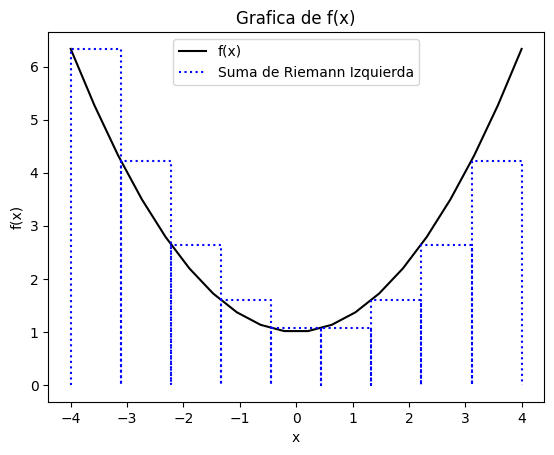

In [9]:
n3 = 10
A3, xbar, ybar = RiemannIzq(f, xi, xf, n3)
e3 = ((Aexacta - A3)/Aexacta)*100

x = np.linspace(xi, xf, 20)

print("Grafica de la funcion")
plt.plot(x, f(x), 'k', label=("f(x)"))
plt.plot(xbar, ybar, 'b:', label=("Suma de Riemann Izquierda"))
plt.xlabel("x")            #Etiqueta de eje
plt.ylabel("f(x)")            #Etiqueta de eje
plt.title("Grafica de f(x)") #Titulo del grafico
plt.legend()                    #Leyendas
plt.show()                      #Mostrar grafico

**Suma de Riemann Derecha $n = 10$**

Grafica de la funcion


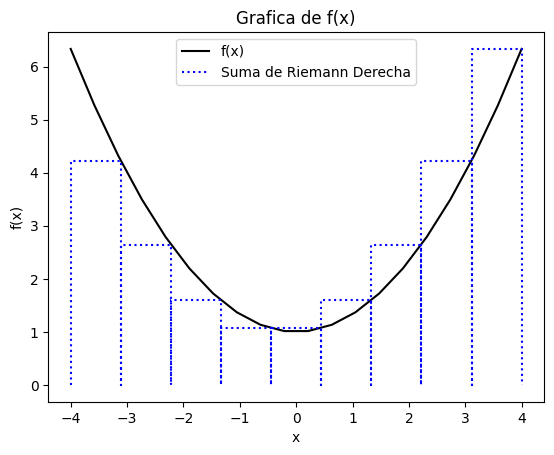

In [10]:
n4 = 10
A4, xbar, ybar = RiemannDer(f, xi, xf, n4)
e4 = ((Aexacta - A4)/Aexacta)*100

x = np.linspace(xi, xf, 20)

print("Grafica de la funcion")
plt.plot(x, f(x), 'k', label=("f(x)"))
plt.plot(xbar, ybar, 'b:', label=("Suma de Riemann Derecha"))
plt.xlabel("x")            #Etiqueta de eje
plt.ylabel("f(x)")            #Etiqueta de eje
plt.title("Grafica de f(x)") #Titulo del grafico
plt.legend()                    #Leyendas
plt.show()                      #Mostrar grafico

**Suma de Riemann Media $n = 10$**

Grafica de la funcion


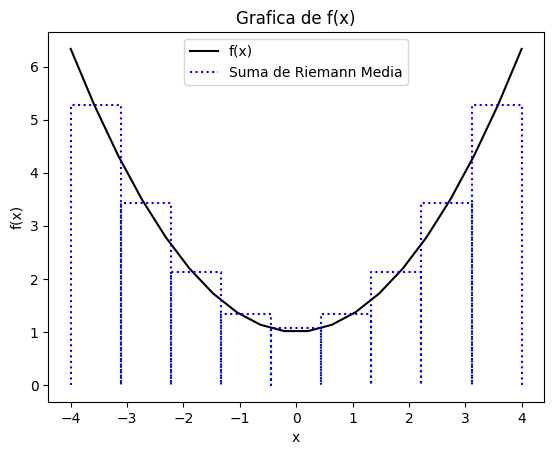

In [11]:
n5 = 10
A5, xbar, ybar = RiemannMed(f, xi, xf, n5)
e5 = ((Aexacta - A5)/Aexacta)*100

x = np.linspace(xi, xf, 20)

print("Grafica de la funcion")
plt.plot(x, f(x), 'k', label=("f(x)"))
plt.plot(xbar, ybar, 'b:', label=("Suma de Riemann Media"))
plt.xlabel("x")            #Etiqueta de eje
plt.ylabel("f(x)")            #Etiqueta de eje
plt.title("Grafica de f(x)") #Titulo del grafico
plt.legend()                    #Leyendas
plt.show()                      #Mostrar grafico

###**Tabla de Resultados**

In [12]:
tabla = [['Izquierda', n3, A3, e3],
         ['Derecha', n4, A4, e4],
         ['Media', n5, A5, e5]]


print(tabulate(tabla, headers = ["Particion", "Suma", "Error (%)"]))

             Particion     Suma    Error (%)
---------  -----------  -------  -----------
Izquierda           10  22.5734     -1.58025
Derecha             10  22.5734     -1.58025
Media               10  22.5734     -1.58025


## **Referencias**

https://es.wikipedia.org/wiki/Suma_de_Riemann